In [74]:
from datetime import datetime
import requests
import json
import pandas as pd
import seaborn as sns

In [75]:
url = "https://api.mercadolibre.com/sites/MLA/search?q=nintendo+switch&condition=new&limit=50"  # Endpoint a consultar
response = requests.get(url)

In [76]:
data = json.loads(response.text)
results=pd.DataFrame(data["results"])

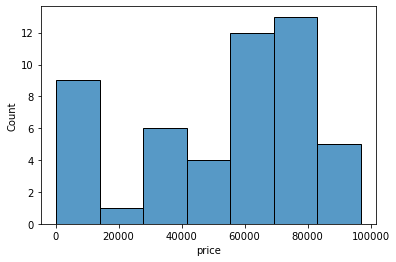

In [77]:
chart = sns.histplot(results['price'])

In [78]:
! jupyter nbconvert --to script masterMeli.ipynb

[NbConvertApp] Converting notebook masterMeli.ipynb to script
[NbConvertApp] Writing 544 bytes to masterMeli.py
